In [1]:
# https://twitter.com/p_surridge/status/902548587674042368

# want to replicate this and look at distributions

# violinplots with kdes by social grade

In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)

import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"

# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
from gaussian_kde import gaussian_kde
from utility import display_components,display_pca_data


import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline

In [2]:
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster

In [35]:
Treatment = "W13_only" 
if not os.path.exists(BES_data_folder+Treatment):
    os.makedirs(BES_data_folder+Treatment)

In [5]:
dataset = "BES2017_W13_v1.0.dta"
wave = "W13_only"

BES_Panel = pd.read_stata(BES_data_folder+dataset)


In [6]:
England = (BES_Panel["country"]=="England")
Wave13 = (BES_Panel.wave13==1.0)
area = England

constraints = England & Wave13

In [7]:
interest_var = "profile_socialgrade_cie"

In [8]:
BES_Panel.profile_socialgrade_cie.value_counts()

C1         8508
B          5823
C2         5097
A          4179
E          3930
D          3116
Unknown     543
Refused       1
Name: profile_socialgrade_cie, dtype: int64

In [9]:
df = pd.DataFrame([ BES_Panel[interest_var]]).T
df.columns = [interest_var]
df[interest_var] = df[interest_var].astype('category')


In [10]:
# numbers = df[interest_var][constraints].value_counts()    
# new2oldvp = {}
# for ind in numbers.index:
#     newvp = ind + "(N = " + str(numbers.loc[ind]) + ")"
#     new2oldvp[ind] = newvp
#     df.loc[df[interest_var]==ind,interest_var] = newvp
        

In [11]:
try:
    df[interest_var].cat.remove_categories("Refused",inplace=True)
except:
    pass
# df.loc[df[interest_var]=="Refused",interest_var]
order = df[interest_var].cat.categories

In [12]:
# BES_Panel.loc[LAB2OTH[0], "al_scaleW13"].cat.codes.value_counts()
wave = ""

df["al_scale"] = BES_Panel["al_scale"+wave].cat.codes
df["al_scale"].replace(-1, np.nan, inplace=True)

df["lr_scale"] = BES_Panel["lr_scale"+wave].cat.codes
df["lr_scale"].replace(-1, np.nan, inplace=True)

df["weights"] = BES_Panel['wt_new_W13']

# drop everything that's nan in voting_path
df = df[df[interest_var].notnull()]



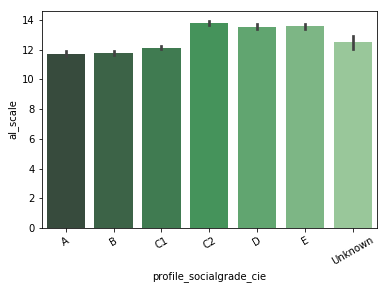

In [13]:

g = sns.barplot(x=interest_var, y="al_scale", data=df, palette="Greens_d");
g.set_xticklabels(labels = order, rotation=30);

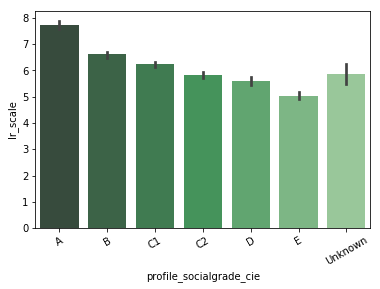

In [14]:

g = sns.barplot(x=interest_var, y="lr_scale", data=df, palette="Greens_d");
g.set_xticklabels(labels = order, rotation=30);

In [15]:
df_stacked = df[[interest_var,"al_scale","weights"]].dropna().copy()
df_stacked["scale"] = "al_scale"
df_stacked.columns = [interest_var,"values","weights","scale"]

df2_stacked = df[[interest_var,"lr_scale","weights"]].dropna().copy()
df2_stacked["scale"] = "lr_scale"
df2_stacked.columns = [interest_var,"values","weights","scale"]

normalise = False
if normalise:
    scaler = StandardScaler()
    df_stacked["values"] = scaler.fit_transform(df_stacked["values"].values.reshape(-1,1)).reshape(1,-1)[0]
    df2_stacked["values"] = scaler.fit_transform(df2_stacked["values"].values.reshape(-1,1)).reshape(1,-1)[0]
    
df3 = df_stacked.append(df2_stacked)

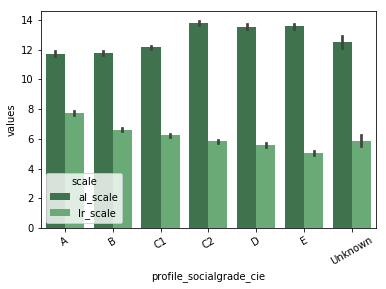

In [16]:

g = sns.barplot(x=interest_var, y="values", hue = "scale", data=df3, palette="Greens_d", order=order);
g.set_xticklabels(labels = order, rotation=30);

In [30]:
# from gaussian_kde import gaussian_kde
# import matplotlib as mpl


# def fit_kde(self, x, bw):
#     """Estimate a KDE for a vector of data with flexible bandwidth."""
#     # Allow for the use of old scipy where `bw` is fixed
#     #raise ValueError('A very specific bad thing happened')
#   #  self.weights = None
# #CHANGED: ADD **kwargs and this if if clause

# #     self.weights = None
#     if self.weights is not None:
# #         print(x.shape[0], self.weights[x.shape[0]])
#         # use Tilla Hoffman's weighted gaussian kde
#         kde = gaussian_kde(x, bw, weights=self.weights[x.shape[0]])
#     else:
# #         raise ValueError('A very specific bad thing happened')
#         try:
#             kde = stats.gaussian_kde(x, bw)
#         except TypeError:
#             kde = stats.gaussian_kde(x)
#             if bw != "scott":  # scipy default
#                 msg = ("Ignoring bandwidth choice, "
#                        "please upgrade scipy to use a different bandwidth.")
#                 warnings.warn(msg, UserWarning)

#     # Extract the numeric bandwidth from the KDE object
#     bw_used = kde.factor

#     # At this point, bw will be a numeric scale factor.
#     # To get the actual bandwidth of the kernel, we multiple by the
#     # unbiased standard deviation of the data, which we will use
#     # elsewhere to compute the range of the support.
#     bw_used = bw_used * x.std(ddof=1)

#     return kde, bw_used
    
# sns.categorical._ViolinPlotter.fit_kde = fit_kde
# #################################################

# def __init__(self, x, y, hue, data, order, hue_order,
#              bw, cut, scale, scale_hue, gridsize,
#              width, inner, split, orient, linewidth,
#              color, palette, saturation, **kwargs):

#   #  raise ValueError('A very specific bad thing happened')
#     if "weights" in kwargs.keys():
#         self.weights = kwargs["weights"]
# #         raise ValueError('A very specific bad thing happened')
#     else:
#         self.weights = None    
    
#     self.establish_variables(x, y, hue, data, orient, order, hue_order)
#     self.establish_colors(color, palette, saturation)
#     self.estimate_densities(bw, cut, scale, scale_hue, gridsize)

#     self.gridsize = gridsize
#     self.width = width

#     if inner is not None:
#         if not any([inner.startswith("quart"),
#                     inner.startswith("box"),
#                     inner.startswith("stick"),
#                     inner.startswith("point")]):
#             err = "Inner style '{}' not recognized".format(inner)
#             raise ValueError(err)
#     self.inner = inner

#     if split and self.hue_names is not None and len(self.hue_names) != 2:
#         raise ValueError("Cannot use `split` with more than 2 hue levels.")
#     self.split = split

#     if linewidth is None:
#         linewidth = mpl.rcParams["lines.linewidth"]
#     self.linewidth = linewidth
    
    
# sns.categorical._ViolinPlotter.__init__ = __init__


# ############################################################


# def violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
#                bw="scott", cut=2, scale="area", scale_hue=True, gridsize=100,
#                width=.8, inner="box", split=False, orient=None, linewidth=None,
#                color=None, palette=None, saturation=.75, ax=None, **kwargs):

#     kw_string = ', '.join(['{}={!r}'.format(k, v) for k, v in kwargs.items()])    
    
#  #   raise ValueError("dfdfdf", kw_string)
# #     raise ValueError('A very specific bad thing happened')
    
#     # Try to handle broken backwards-compatability
#     # This should help with the lack of a smooth deprecation,
#     # but won't catch everything
#     warn = False
#     if isinstance(x, pd.DataFrame):
#         data = x
#         x = None
#         warn = True

#     if "vals" in kwargs:
#         x = kwargs.pop("vals")
#         warn = True

#     if "groupby" in kwargs:
#         y = x
#         x = kwargs.pop("groupby")
#         warn = True

#     if "vert" in kwargs:
#         vert = kwargs.pop("vert", True)
#         if not vert:
#             x, y = y, x
#         orient = "v" if vert else "h"
#         warn = True

#     msg = ("The violinplot API has been changed. Attempting to adjust your "
#            "arguments for the new API (which might not work). Please update "
#            "your code. See the version 0.6 release notes for more info.")
#     if warn:
#         warnings.warn(msg, UserWarning)
#     # CHANGE: ADD ,**kwargs
#     plotter = sns.categorical._ViolinPlotter(x, y, hue, data, order, hue_order,
#                              bw, cut, scale, scale_hue, gridsize,
#                              width, inner, split, orient, linewidth,
#                              color, palette, saturation, **kwargs)

#     if ax is None:
#         ax = plt.gca()

#     plotter.plot(ax)
#     return ax

# sns.categorical.violinplot = violinplot



In [36]:
weights = {}
for scale in df3["scale"].unique():
    for voting_path in df3[interest_var].unique():
        wgts = df3[ (df3["scale"]==scale) & (df3[interest_var]==voting_path) ]["weights"].values
        wgts_len = wgts.shape[0]
        
        if np.isnan(wgts).any():
            raise ValueError("nan in the weights!")
        
        if wgts_len not in weights.keys():
            weights[wgts_len] = wgts
        else:
            raise ValueError("This hack only works if the size of each group is different!")
            
            # non-lazy way of doing same thing - create a hash!
            

In [37]:
gc.collect()

19042

TypeError: __init__() takes 20 positional arguments but 21 were given

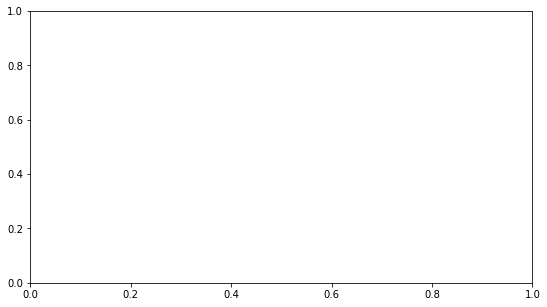

In [40]:
graph_name = 'SocialGrade_by_values_weighted'

fig, ax = plt.subplots(figsize=(9,5))
#cut=0,
if normalise:
    kwargs = {}
    graph_name = graph_name + '_normalised'
else:
    kwargs = {"cut":0}
df3 = df_stacked.append(df2_stacked)
g = sns.violinplot(x=interest_var, y="values", hue = "scale", data=df3,
                   palette="Greens_d", split=True,  inner=None, order=order, 
                   ax=ax, **kwargs);
#                    weights=weights, ax=ax, **kwargs);
g.set_xticklabels(labels = order, rotation=10);

fig.savefig(BES_data_folder+graph_name+'.png')

TypeError: __init__() takes 20 positional arguments but 21 were given

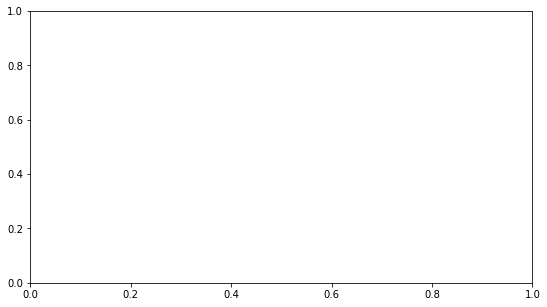

In [26]:
import seaborn as sns
graph_name = 'SocialGrade_by_values_not_weighted'

fig, ax = plt.subplots(figsize=(9,5))
#cut=0,
if normalise:
    kwargs = {}
    graph_name = graph_name + '_normalised'
else:
    kwargs = {"cut":0}
df3 = df_stacked.append(df2_stacked)
g = sns.violinplot(x=interest_var, y="values", hue = "scale", data=df3,
                   palette="Greens_d",  order=order, 
                    ax=ax, **kwargs);
g.set_xticklabels(labels = order, rotation=10);


In [27]:

g = sns.barplot(x=interest_var, y=BES_Panel.cat.codes, data=BES_Panel, palette="Greens_d");
g.set_xticklabels(labels = order, rotation=30);

AttributeError: 'DataFrame' object has no attribute 'cat'

In [ ]:
def cat2num(x):
    return BES_Panel[x].cat.codes.replace(-1, np.nan)


In [ ]:
cat2num("lr1")

In [ ]:
BES_Panel["lr1"].cat.codes.value_counts()